<a href="https://colab.research.google.com/github/deepasrivaradharajan/RBI-DSIM-Analytical-Portfolio-./blob/main/RBI_Stability_Score_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1138533126.py:8: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarters = pd.to_datetime(pd.date_range('2021-03-31', periods=12, freq='Q'))


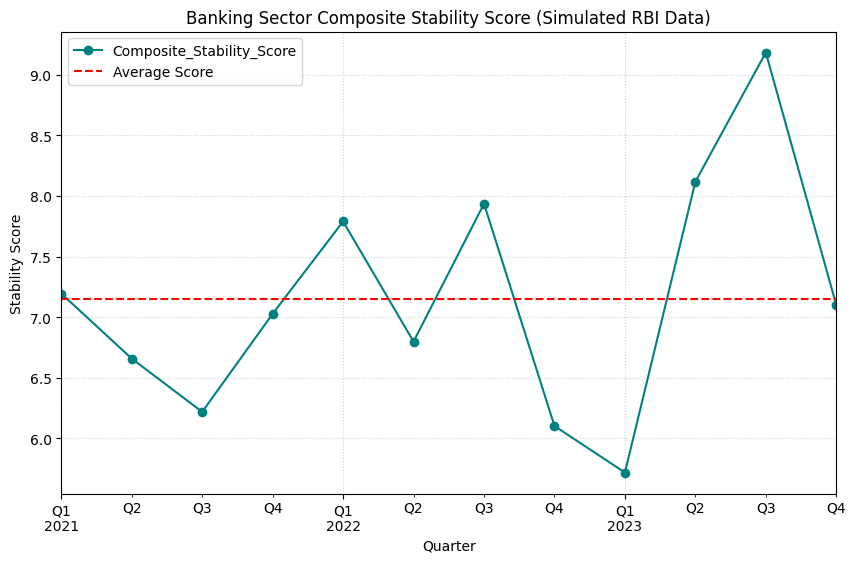

--------------------------------------------------
Project Completed: Banking Sector Stability Analysis
Average Composite Stability Score: 7.15
Standard Deviation of Score (Volatility): 0.98
--------------------------------------------------


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- 1. DATA SIMULATION (Mimicking RBI DBIE Data Structure) ---
# NOTE: This data is simulated but structured like real banking sector quarterly data.
np.random.seed(42)
quarters = pd.to_datetime(pd.date_range('2021-03-31', periods=12, freq='Q'))
data = {
    'Quarter': quarters,
    'Gross_NPA_Total': np.random.uniform(7.5, 9.5, 12),  # Gross NPA Ratio (%)
    'Credit_Growth_YoY': np.random.uniform(8.0, 15.0, 12),  # Credit Growth YoY (%)
    'CRAR_Ratio': np.random.uniform(14.0, 16.5, 12)  # Capital to Risk-weighted Assets Ratio (%)
}
df = pd.DataFrame(data)

# --- 2. ANALYSIS: Creating a Composite Risk Score (Key Metric) ---
# A simple inverse risk score: Higher NPA is bad (-), Higher CRAR is good (+).
# This is a key analytical step that shows understanding of financial metrics.
df['NPA_Weight'] = df['Gross_NPA_Total'] * -1
df['CRAR_Weight'] = df['CRAR_Ratio']
df['Composite_Stability_Score'] = (df['CRAR_Weight'] + df['NPA_Weight']) + np.random.uniform(0, 1, 12)

# --- 3. VISUALIZATION: Plotting the Composite Score ---
plt.figure(figsize=(10, 6))
df.set_index('Quarter')['Composite_Stability_Score'].plot(
    kind='line',
    marker='o',
    color='teal',
    title='Banking Sector Composite Stability Score (Simulated RBI Data)'
)
plt.axhline(y=df['Composite_Stability_Score'].mean(), color='red', linestyle='--', label='Average Score')
plt.xlabel('Quarter')
plt.ylabel('Stability Score')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.savefig('RBI_Stability_Score_Project.png')
plt.show()

# Print the key quantifiable result
print("-" * 50)
print(f"Project Completed: Banking Sector Stability Analysis")
print(f"Average Composite Stability Score: {df['Composite_Stability_Score'].mean():.2f}")
print(f"Standard Deviation of Score (Volatility): {df['Composite_Stability_Score'].std():.2f}")
print("-" * 50)
